Name : Prachet Prasad Pandav 

Roll No. : 21102A0020

Github link : https://github.com/prachet283/ML-Project-3-House-Price-Prediction-WebApp/tree/main/Updated

# Upgrading Scikit Learn Library

In [1]:
!pip install scikit-learn==1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Importing Dependencies & Dataset

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [3]:
# loading the house price dataset to a pandas dataFrame
house_price_dataset = pd.read_csv('/content/Project 3 House_Price_Prediction_using_ParisHousing_Dataset.csv')

# Exploratory Data Analysis

In [4]:
# first 5 rows in the dataset
house_price_dataset.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1      3653   2436     128               1             2  8085989.5  
2      2937   8852     135               1             9  5574642.1  
3       659   7141     359               0             3  3232561.2  
4      8435   2429     292               1             4  7055052.0

In [5]:
# last 5 rows in the dataset
house_price_dataset.tail()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
9995              7              6  2009           0                  1   
9996              9              4  1990           0                  1   
9997             10             10  2005           1                  1   
9998              1              3  2010           0                  1   
9999              6             10  1994           1                  0   

      basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
9995      9311   1698     218               0             4   176425.9  
9996      9061   1742     230               0             0  4448474.0  
9997      8304   7730     345               1             9  8390030.5  
9998      2590   6174     339               1             4  5905107.0  
9999      8485   2024     278               1             6   146708.4

In [6]:
# number of rows & columns
house_price_dataset.shape

(10000, 17)

In [7]:
# getting info about the dataset
house_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [8]:
# checking null values
house_price_dataset.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [9]:
# getting the stats about dataset
house_price_dataset.describe()

squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std    29006.675799       2.872024       2.856667      9.30809      0.500024   
min        3.000000       1.000000       1.000000   1990.00000      0.000000   
25%    24693.750000       3.000000       3.000000   1997.00000      0.000000   
50%    50693.000000       5.000000       5.000000   2005.50000      0.000000   
75%    75683.250000       8.000000       8.000000   2014.00000      1.000000   
max    99953.000000      10.000000      10.000000   2021.00000      1.000000   

       hasStormProtector      basement        attic       garage  \
count       10000.000000  10000.000000  10000.00000  10000.00000   
mean            0.499900   5033.103900   5028.01060    553.12120   
std             0.500025   2876.729545   2894.33221    262.05017   
min             0.000000      0.000000      1.00000    100.00000   
25%             0.000000   2559.750000   2512.00000    327.75000   
50%             0.000000   5092.500000   5045.00000    554.00000   
75%             1.000000   7511.250000   7540.50000    777.25000   
max             1.000000  10000.000000  10000.00000   1000.00000   

       hasStorageRoom  hasGuestRoom         price  
count    10000.000000   10000.00000  1.000000e+04  
mean         0.503000       4.99460  4.993448e+06  
std          0.500016       3.17641  2.877424e+06  
min          0.000000       0.00000  1.031350e+04  
25%          0.000000       2.00000  2.516402e+06  
50%          1.000000       5.00000  5.016180e+06  
75%          1.000000       8.00000  7.469092e+06  
max          1.000000      10.00000  1.000677e+07

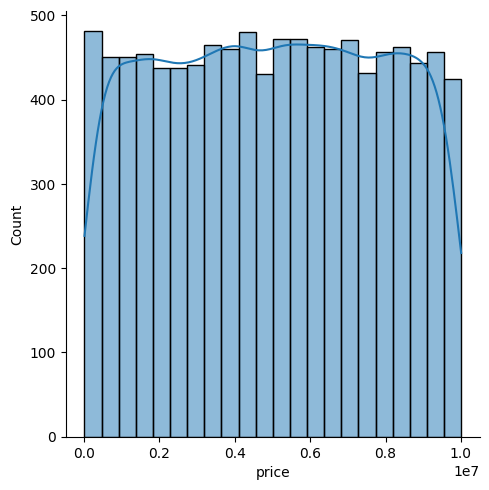

In [10]:
# distribution plot for price
sns.displot(data=house_price_dataset, x = 'price', kde=True)

Text(0.5, 1.0, 'Square Meters vs Price')

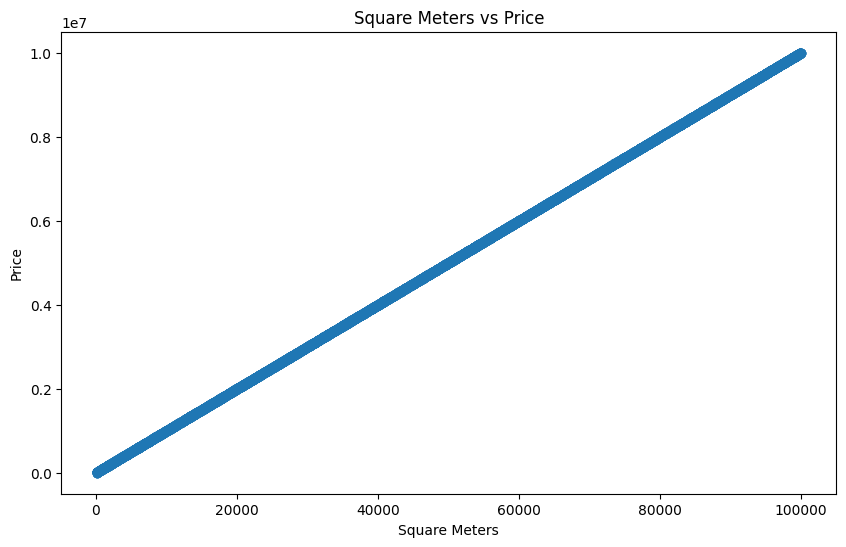

In [11]:
# plotting the squaremeters vs price
plt.figure(figsize=(10, 6))
plt.scatter(house_price_dataset['squareMeters'], house_price_dataset['price'])
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.title('Square Meters vs Price')

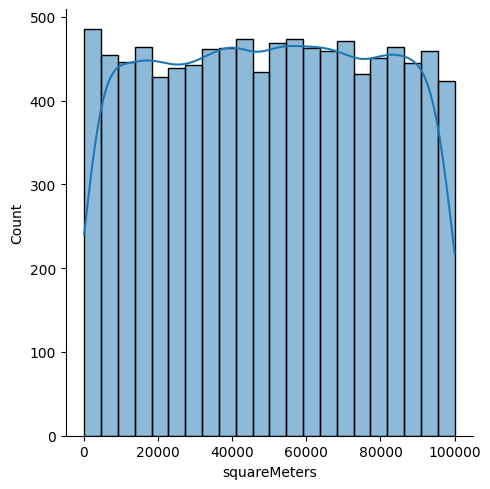

In [12]:
# distribution plot for squareMeters
sns.displot(data=house_price_dataset, x = 'squareMeters', kde=True)

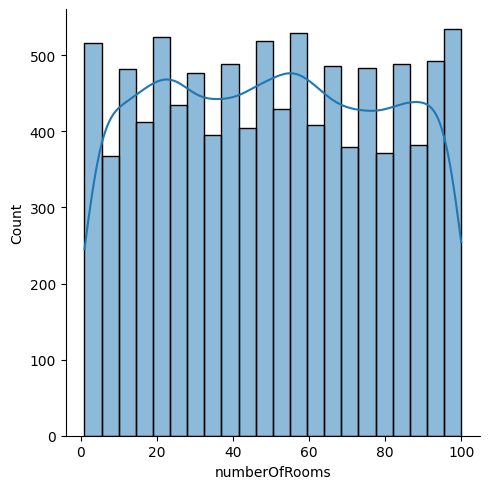

In [13]:
# distribution plot for numberOfRooms
sns.displot(data=house_price_dataset, x = 'numberOfRooms', kde=True)

<Axes: xlabel='hasYard', ylabel='count'>

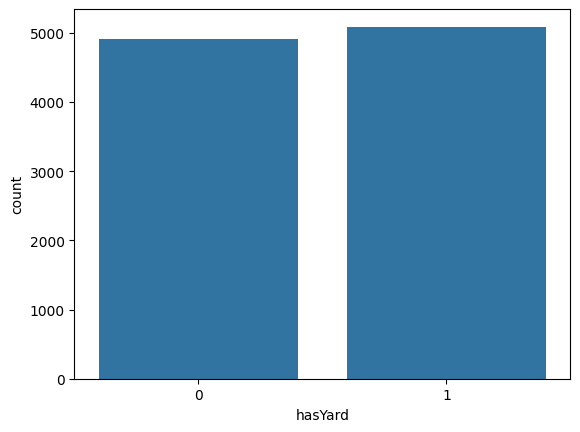

In [14]:
#count plot for hasYard
sns.countplot(data=house_price_dataset,x='hasYard')

<Axes: xlabel='hasPool', ylabel='count'>

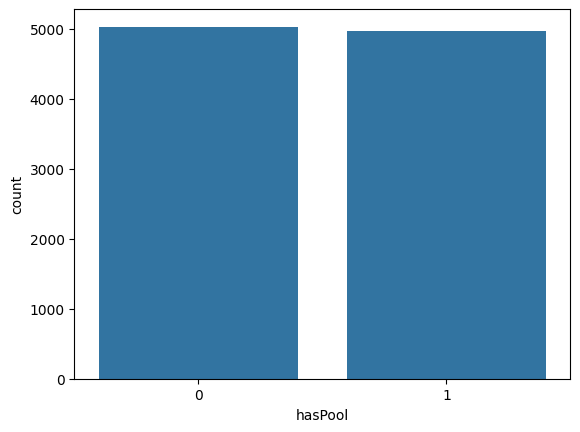

In [15]:
#count plot for hasPool
sns.countplot(data=house_price_dataset,x='hasPool')

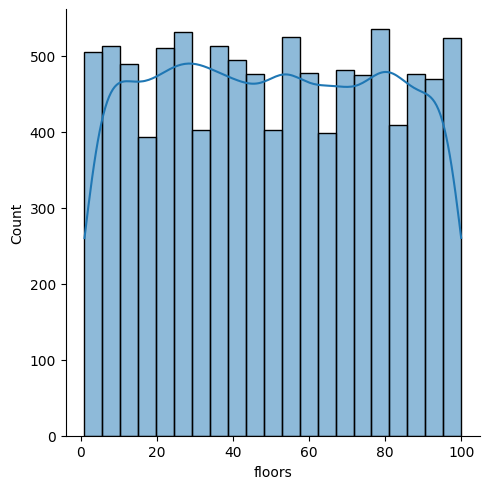

In [16]:
# distribution plot for floors
sns.displot(data=house_price_dataset, x = 'floors', kde=True)

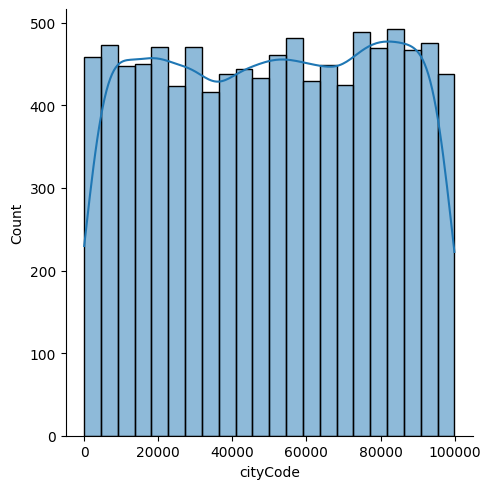

In [17]:

# distribution plot for cityCode
sns.displot(data=house_price_dataset, x = 'cityCode', kde=True)

<Axes: xlabel='cityPartRange', ylabel='count'>

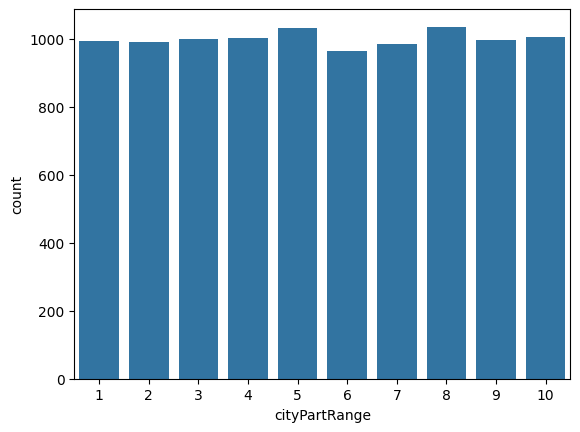

In [18]:
#count plot for cityPartRange
sns.countplot(data=house_price_dataset,x='cityPartRange')

<Axes: xlabel='numPrevOwners', ylabel='count'>

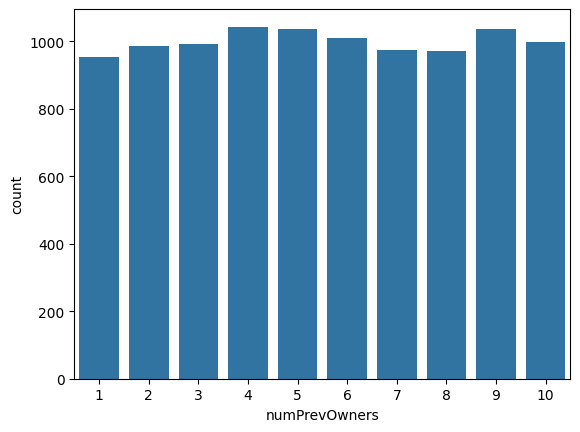

In [19]:
#count plot for numPrevOwners
sns.countplot(data=house_price_dataset,x='numPrevOwners')

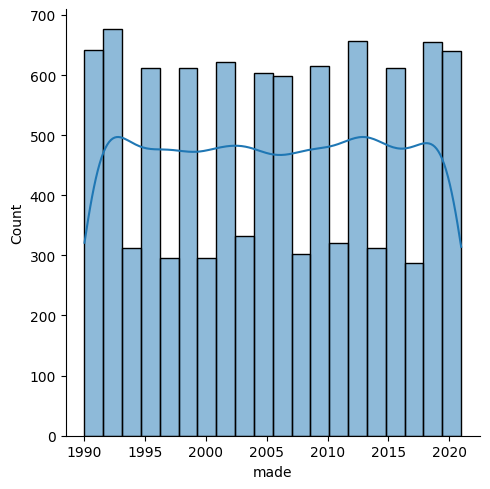

In [20]:
# distribution plot for made
sns.displot(data=house_price_dataset, x = 'made', kde=True)

<Axes: xlabel='made', ylabel='count'>

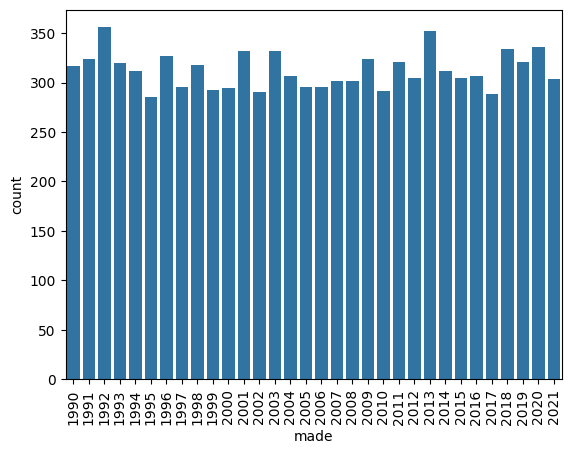

In [21]:
#writing x label at 180degreee
plt.xticks(rotation=90)
#count plot for made
sns.countplot(x='made',data=house_price_dataset,)

<Axes: xlabel='isNewBuilt', ylabel='count'>

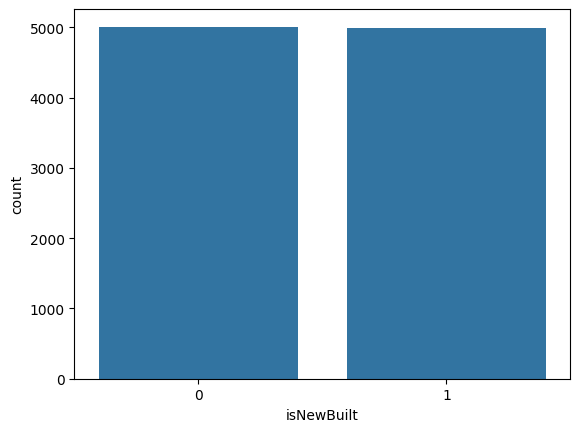

In [22]:
	#count plot for isNewBuilt
sns.countplot(data=house_price_dataset,x='isNewBuilt')

<Axes: xlabel='hasStormProtector', ylabel='count'>

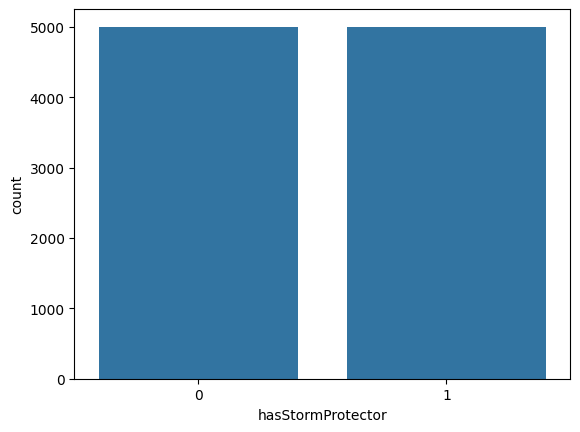

In [23]:
#count plot for hasStormProtector
sns.countplot(data=house_price_dataset,x='hasStormProtector')

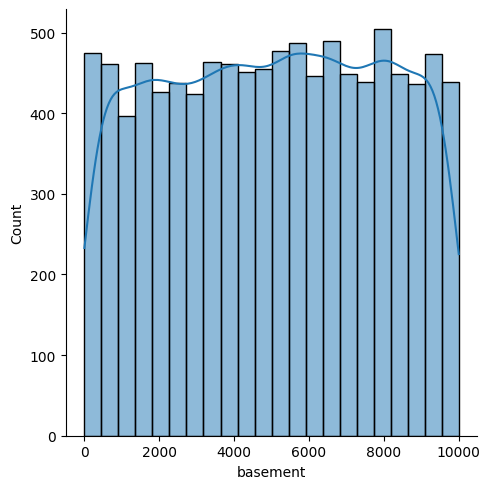

In [24]:
# distribution plot for basement
sns.displot(data=house_price_dataset, x = 'basement', kde=True)

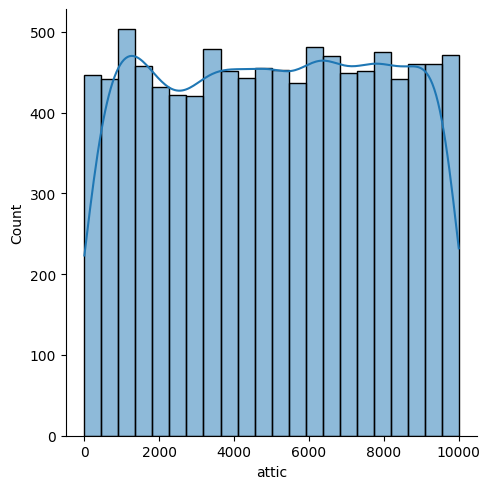

In [25]:
# distribution plot for attic
sns.displot(data=house_price_dataset, x = 'attic', kde=True)

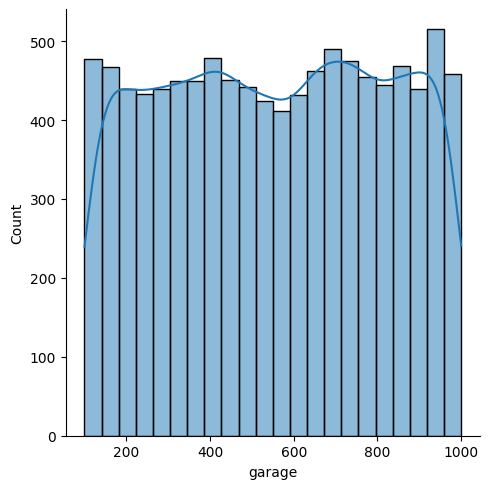

In [26]:
# distribution plot for garage
sns.displot(data=house_price_dataset, x = 'garage', kde=True)

<Axes: xlabel='hasStorageRoom', ylabel='count'>

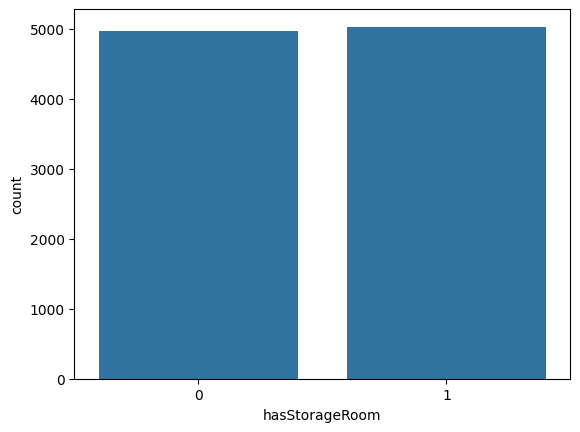

In [27]:
#count plot for hasStorageRoom
sns.countplot(data=house_price_dataset,x='hasStorageRoom')

<Axes: xlabel='hasGuestRoom', ylabel='count'>

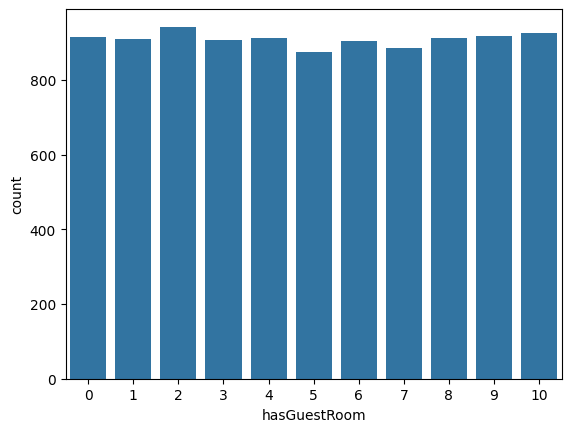

In [28]:
#count plot for hasGuestRoom
sns.countplot(data=house_price_dataset,x='hasGuestRoom')

In [29]:
# converting the category columns to string data type
cat_cols = ['hasYard', 'hasPool', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt','hasStormProtector', 'hasStorageRoom','hasGuestRoom']
house_price_dataset[cat_cols] = house_price_dataset[cat_cols].astype('str')

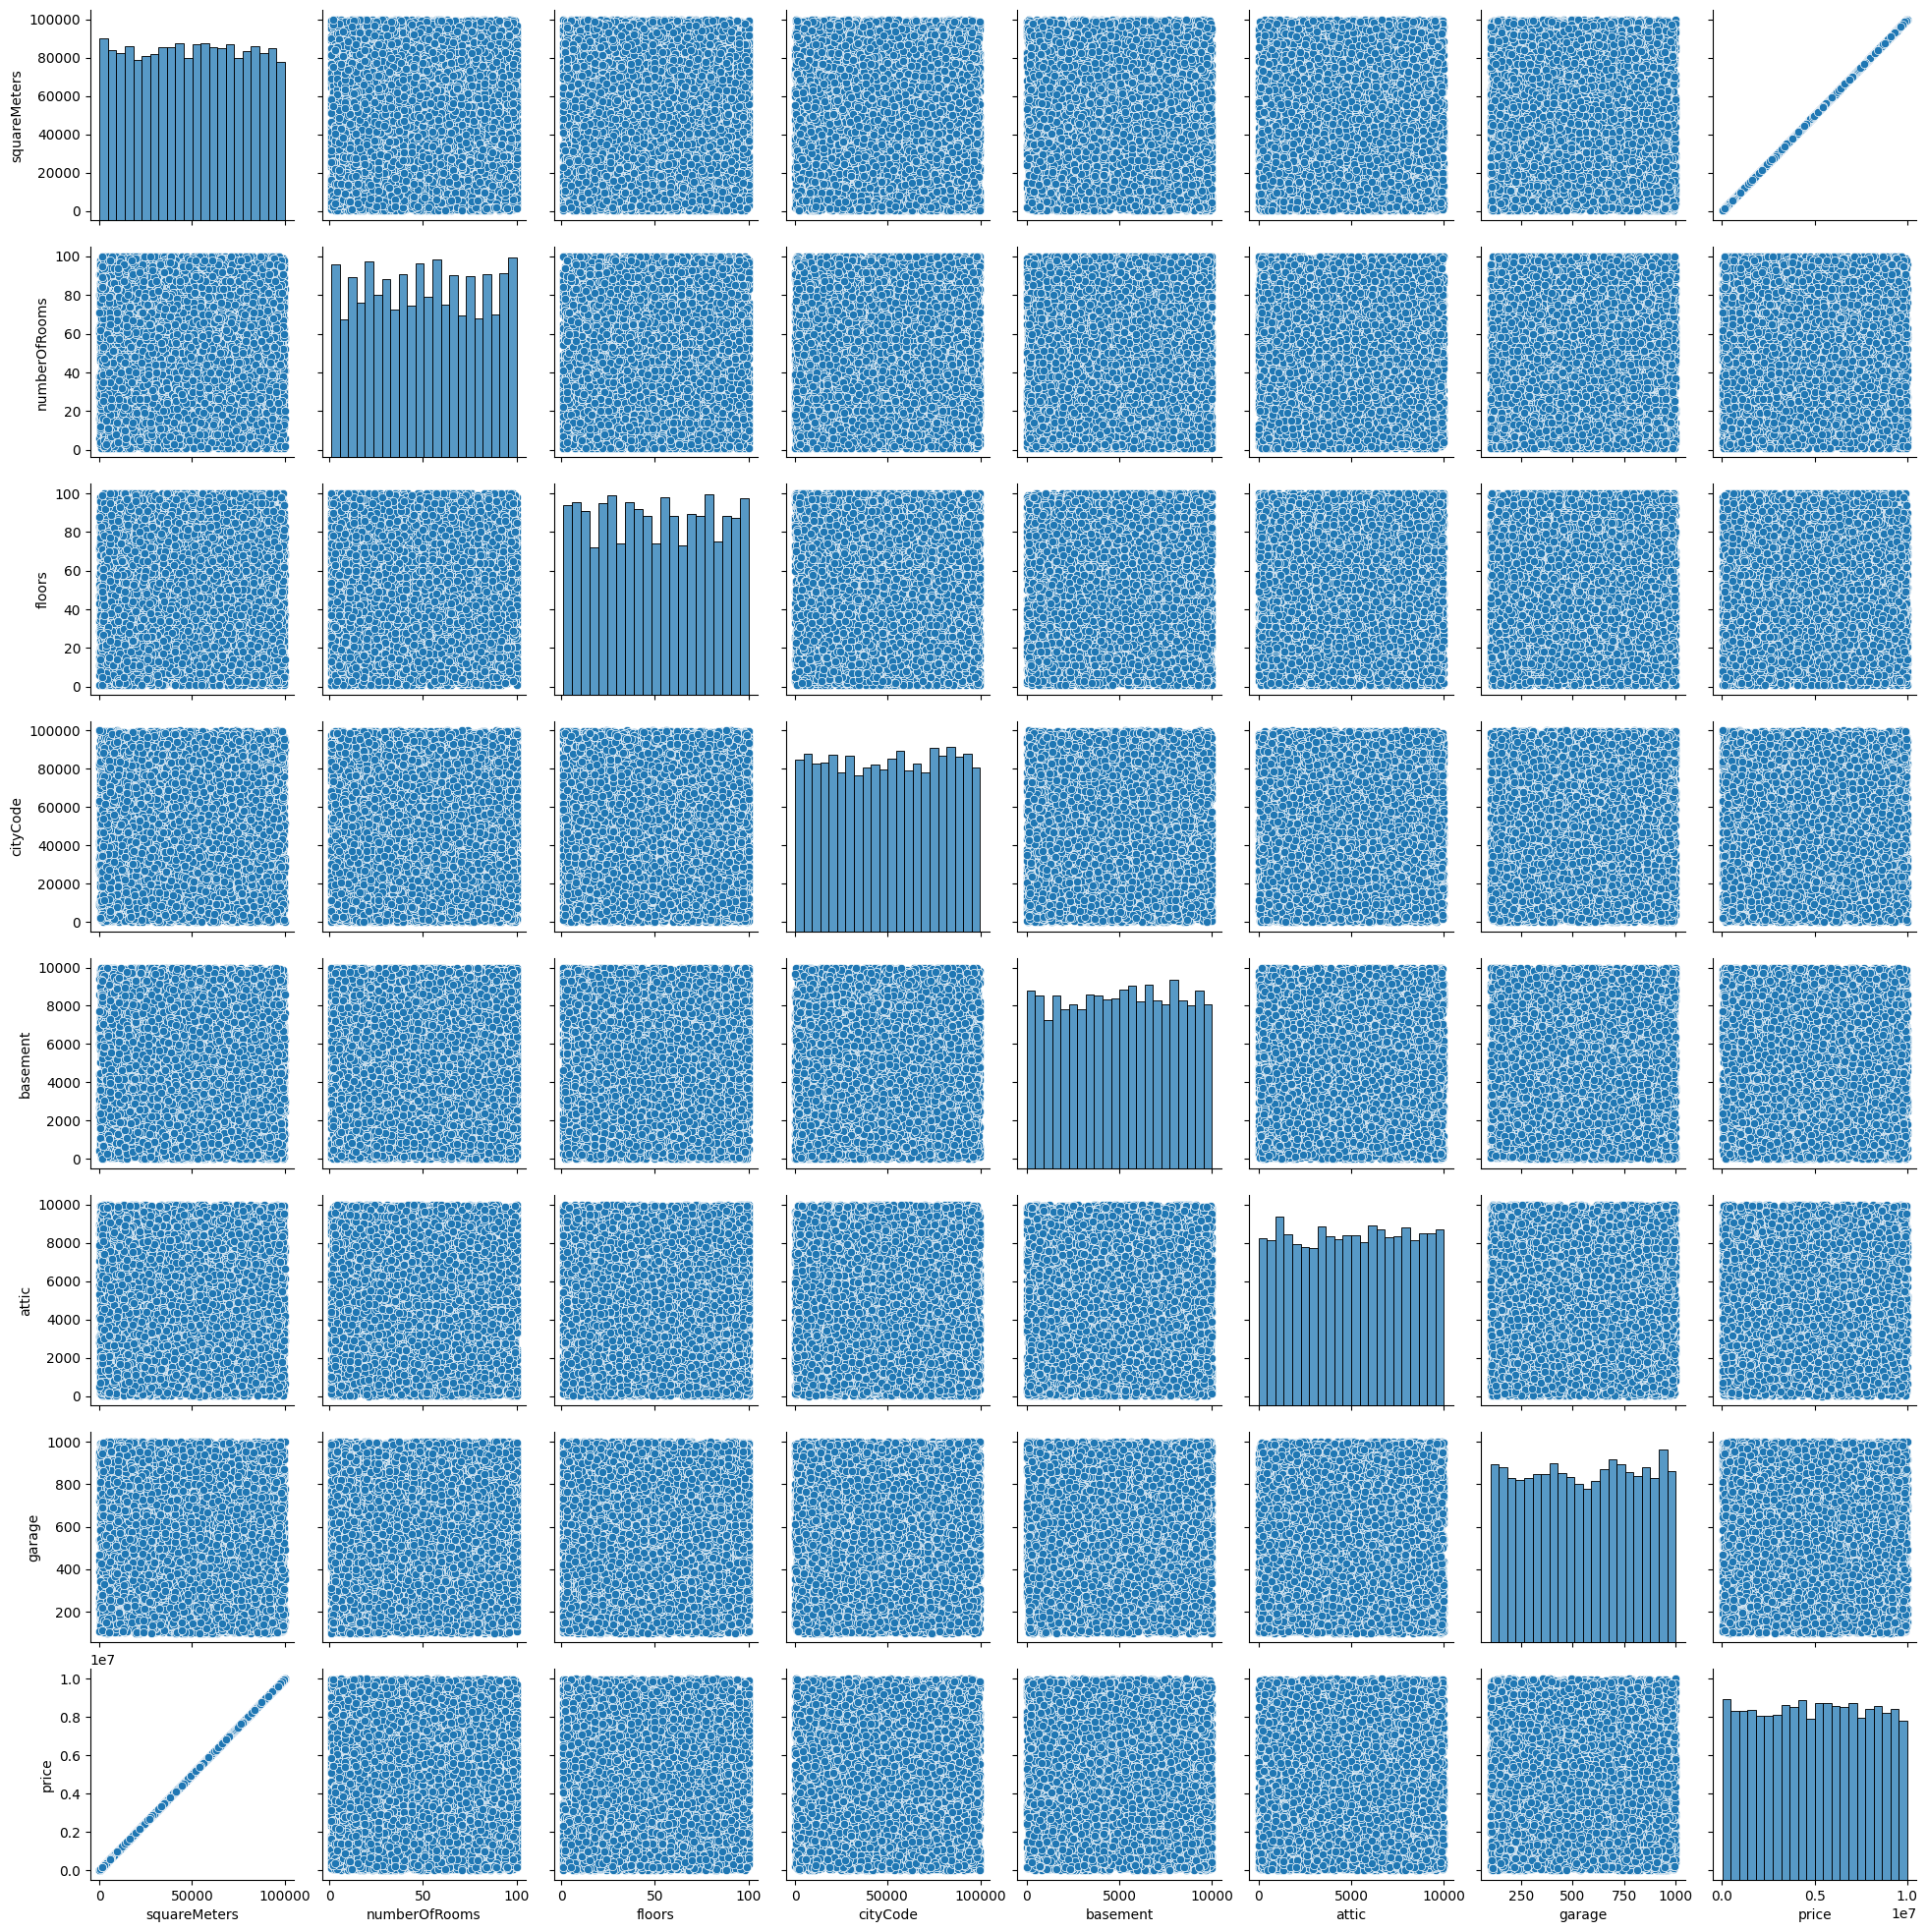

In [30]:
# pairplot for the dataset
sns.pairplot(house_price_dataset)

In [31]:
# rechecking the datatype
house_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  object 
 3   hasPool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  object 
 7   numPrevOwners      10000 non-null  object 
 8   made               10000 non-null  object 
 9   isNewBuilt         10000 non-null  object 
 10  hasStormProtector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  object 
 15  hasGuestRoom       10000 non-null  object 
 16  price              1000

<Axes: >

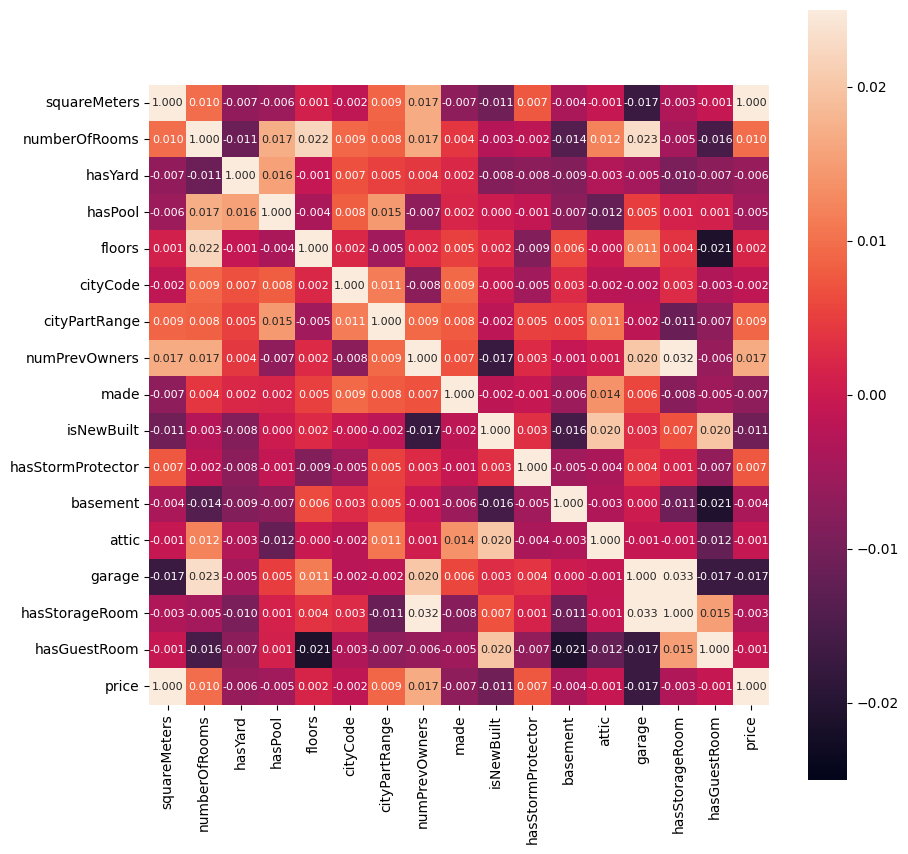

In [32]:
# constructing a heat map to understand correlation
correlation = house_price_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmin=-0.025 , vmax=0.025,cbar=True,square=True,annot=True,fmt='.3f', annot_kws={'size':8})

Understanding the correlation between the features in the dataset


1.   Positive Correlation
2.   Nrgative Correlation



# Data Preprocessing & Splitting

Splitting the Data

In [33]:
# seperating the data and labels
X = house_price_dataset.drop(columns = 'price', axis = 1)
y = house_price_dataset['price']

In [34]:
#importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

In [35]:
# spliting the data in training & testing data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [36]:
print(X.shape, X_train.shape , X_test.shape)

(10000, 16) (8000, 16) (2000, 16)


In [37]:
# saving the all columns of training data
all_columns = X_train.columns

Standardizing the Data

In [38]:
# importing the Standard Scaler to standardize the data
from sklearn.preprocessing import StandardScaler

In [39]:
#scaling the training data
scaler = StandardScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)

In [41]:
# Create a DataFrame with the encoded features
X_train = pd.DataFrame(X_train_scaled, columns=all_columns)

In [42]:
X_train.head()

squareMeters  numberOfRooms   hasYard   hasPool    floors  cityCode  \
0      1.118998       0.222798 -1.014607  1.006521 -1.664664  0.100225   
1      1.020945       1.298720 -1.014607 -0.993521  0.996310  0.979392   
2      0.995487       0.708699  0.985604  1.006521  1.583798 -0.367779   
3     -1.185374      -0.887831  0.985604 -0.993521  0.166916 -1.136450   
4     -1.624404       0.292213 -1.014607 -0.993521  1.549240 -0.497615   

   cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector  \
0       0.514282      -1.578452 -1.669715   -0.994764          -0.998501   
1       0.514282       0.169170 -1.562381    1.005264           1.001501   
2       1.557275       1.567268 -1.669715    1.005264           1.001501   
3      -1.571703       0.518694  0.154964   -0.994764           1.001501   
4       0.166618       0.169170 -0.167039    1.005264           1.001501   

   basement     attic    garage  hasStorageRoom  hasGuestRoom  
0  0.399467  1.705792  0.706920         1.00025     -0.939629  
1  0.302882  0.353532  0.729793        -0.99975     -0.623482  
2 -0.179002 -0.994934 -0.844610         1.00025      0.324960  
3  1.149219 -1.199101  1.175810         1.00025      0.957254  
4  1.621375  0.394917 -0.810301        -0.99975      0.008813

In [43]:
X_train.describe()

squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count  8.000000e+03   8.000000e+03  8.000000e+03  8.000000e+03  8.000000e+03   
mean   9.858780e-17   7.815970e-17  9.148238e-17 -6.217249e-17 -5.861978e-17   
std    1.000063e+00   1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00   
min   -1.732997e+00  -1.720803e+00 -1.014607e+00 -9.935210e-01 -1.699222e+00   
25%   -8.599627e-01  -8.531237e-01 -1.014607e+00 -9.935210e-01 -8.698273e-01   
50%    8.483989e-03   1.455532e-02  9.856036e-01 -9.935210e-01 -5.874877e-03   
75%    8.547201e-01   8.475272e-01  9.856036e-01  1.006521e+00  8.926357e-01   
max    1.764077e+00   1.715206e+00  9.856036e-01  1.006521e+00  1.722030e+00   

           cityCode  cityPartRange  numPrevOwners          made    isNewBuilt  \
count  8.000000e+03   8.000000e+03   8.000000e+03  8.000000e+03  8.000000e+03   
mean  -1.021405e-16   1.261213e-16  -2.797762e-17 -9.764189e-15  1.287859e-17   
std    1.000063e+00   1.000063e+00   1.000063e+00  1.000063e+00  1.000063e+00   
min   -1.741381e+00  -1.571703e+00  -1.578452e+00 -1.669715e+00 -9.947637e-01   
25%   -8.688733e-01  -8.763748e-01  -8.794035e-01 -9.183768e-01 -9.947637e-01   
50%    1.224896e-02   1.666181e-01  -1.803546e-01  4.762947e-02 -9.947637e-01   
75%    8.736520e-01   8.619467e-01   8.682187e-01  9.063017e-01  1.005264e+00   
max    1.716408e+00   1.557275e+00   1.567268e+00  1.657640e+00  1.005264e+00   

       hasStormProtector      basement         attic        garage  \
count       8.000000e+03  8.000000e+03  8.000000e+03  8.000000e+03   
mean        6.217249e-17 -1.776357e-18 -1.101341e-16  1.589839e-16   
std         1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00   
min        -9.985011e-01 -1.751465e+00 -1.731934e+00 -1.717583e+00   
25%        -9.985011e-01 -8.603100e-01 -8.698300e-01 -8.598582e-01   
50%        -9.985011e-01  3.414575e-02  1.141502e-02 -5.944989e-03   
75%         1.001501e+00  8.619820e-01  8.661046e-01  8.632166e-01   
max         1.001501e+00  1.722476e+00  1.716483e+00  1.713318e+00   

       hasStorageRoom  hasGuestRoom  
count    8.000000e+03  8.000000e+03  
mean    -4.041212e-17 -5.329071e-17  
std      1.000063e+00  1.000063e+00  
min     -9.997500e-01 -1.571923e+00  
25%     -9.997500e-01 -9.396290e-01  
50%     -9.997500e-01  8.812603e-03  
75%      1.000250e+00  9.572542e-01  
max      1.000250e+00  1.589549e+00

Test Data Scaling

In [44]:
X_test_scaled = scaler.transform(X_test)

In [45]:
# Create a DataFrame with the encoded features
X_test = pd.DataFrame(X_test_scaled, columns=all_columns)

In [46]:
X_test.head()

squareMeters  numberOfRooms   hasYard   hasPool    floors  cityCode  \
0      1.049731      -1.512560  0.985604 -0.993521  0.374264 -0.528612   
1     -0.438775       0.986356  0.985604  1.006521  1.272775  0.257425   
2      1.257146      -0.506052  0.985604 -0.993521 -0.213223  1.143270   
3      0.512403      -0.714295  0.985604  1.006521  0.166916  0.100536   
4      0.524345       1.333427  0.985604  1.006521  0.616171 -1.578611   

   cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector  \
0       0.861947      -1.228928 -1.025711    1.005264           1.001501   
1      -0.876375      -0.879403  1.442972    1.005264          -0.998501   
2       1.209611       0.518694 -1.455047   -0.994764           1.001501   
3      -0.181046      -0.180355 -1.455047    1.005264          -0.998501   
4       0.514282      -1.228928  1.442972   -0.994764          -0.998501   

   basement     attic    garage  hasStorageRoom  hasGuestRoom  
0 -0.580282  0.889815  1.316858         1.00025     -1.255776  
1  0.213940  1.101224 -1.488857        -0.99975      0.008813  
2  0.575266  0.351808  0.539187         1.00025      0.641107  
3  1.639441  0.388020 -0.097436         1.00025     -1.571923  
4 -1.076063  1.119502 -0.211799        -0.99975      1.589549

In [47]:
X_test.describe()

squareMeters  numberOfRooms      hasYard      hasPool       floors  \
count   2000.000000    2000.000000  2000.000000  2000.000000  2000.000000   
mean       0.051373      -0.038564     0.014502     0.000500     0.018368   
std        1.036643       1.000134     0.999935     1.000253     0.991607   
min       -1.731806      -1.720803    -1.014607    -0.993521    -1.699222   
25%       -0.839249      -0.922538    -1.014607    -0.993521    -0.835269   
50%        0.067420      -0.020152     0.985604    -0.993521     0.028683   
75%        0.974090       0.812820     0.985604     1.006521     0.858078   
max        1.765723       1.715206     0.985604     1.006521     1.722030   

          cityCode  cityPartRange  numPrevOwners         made   isNewBuilt  \
count  2000.000000    2000.000000    2000.000000  2000.000000  2000.000000   
mean     -0.019624      -0.018513       0.009961    -0.036359     0.017250   
std       1.017193       0.992338       0.992308     0.994832     1.000192   
min      -1.741381      -1.571703      -1.578452    -1.669715    -0.994764   
25%      -0.949973      -0.876375      -0.879403    -0.918377    -0.994764   
50%       0.011730      -0.181046      -0.180355    -0.059705     1.005264   
75%       0.884999       0.861947       0.868219     0.798968     1.005264   
max       1.715958       1.557275       1.567268     1.657640     1.005264   

       hasStormProtector     basement        attic       garage  \
count        2000.000000  2000.000000  2000.000000  2000.000000   
mean            0.006500    -0.015834     0.008811     0.048827   
std             1.000239     0.997190     0.990864     0.993851   
min            -0.998501    -1.751813    -1.729865    -1.717583   
25%            -0.998501    -0.880982    -0.826634    -0.814113   
50%             1.001501    -0.051843    -0.000483     0.089358   
75%             1.001501     0.846435     0.878434     0.883230   
max             1.001501     1.721087     1.714414     1.713318   

       hasStorageRoom  hasGuestRoom  
count     2000.000000   2000.000000  
mean         0.031250      0.035527  
std          0.999769      1.020405  
min         -0.999750     -1.571923  
25%         -0.999750     -0.939629  
50%          1.000250      0.008813  
75%          1.000250      0.957254  
max          1.000250      1.589549

In [48]:
#checking the number of rows and columns
X_train.shape

(8000, 16)

# Model Selection

In [49]:
# importing the standard regression models from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [50]:
# all models in a dictionary
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

In [51]:
# importing cross validation score function to calculate the cross validation score
from sklearn.model_selection import cross_val_score

In [52]:
# defining a function who can give you cross validation scores on given data with given set of model
def compare_models_cross_validation(models,X,y):
  for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5,scoring='r2')
    mean_accuracy = cv_score.mean() * 100
    print(f"Model: {name}")
    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print("="*50)

In [53]:
# calling the compare function for the models we choose
compare_models_cross_validation(models,X_train,y_train)

Model: Linear Regression
Cross Validation accuracies for the LinearRegression() = [0.99999958 0.99999956 0.99999955 0.99999956 0.99999955]
Acccuracy score of the  LinearRegression() = 99.9999559484278 %
Model: SVM
Cross Validation accuracies for the SVR() = [-3.81132049e-04 -9.15530826e-04 -3.23552597e-04 -1.99574056e-03
 -7.43461450e-05]
Acccuracy score of the  SVR() = -0.07380604362273502 %
Model: KNN
Cross Validation accuracies for the KNeighborsRegressor() = [0.7869029  0.79248203 0.78145454 0.79313239 0.78332584]
Acccuracy score of the  KNeighborsRegressor() = 78.74595394164065 %
Model: Random Forest
Cross Validation accuracies for the RandomForestRegressor() = [0.99999803 0.99999807 0.99999804 0.99999806 0.99999803]
Acccuracy score of the  RandomForestRegressor() = 99.9998048013723 %
Model: XGBoost
Cross Validation accuracies for the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytre

Top 3:

LinearRegression() = 99.9999559484278 %

RandomForestRegressor() = 99.99980571640626 %

XGBRegressor() = 99.99726021214599 %

# Function for Feature Selection

In [54]:
#importing the RFE
from sklearn.feature_selection import RFE

In [55]:
# defining a function who will give you n best features for the given model and data
def find_best_feature(n,mdl,X,y):
    model = mdl
    rfe = RFE(model, n_features_to_select=n, verbose=0)
    rfe = rfe.fit(X, y)
    selected_col = X.columns[rfe.support_]
    cv_score = cross_val_score(model,X[selected_col],y, cv=5,scoring='r2')
    mean_accuracy = cv_score.mean() * 100
    print("Selected columns: ", list(selected_col))
    print(n, mean_accuracy)
    print("----------------------\n")
    return list(selected_col),mean_accuracy

# 1. LinearRegression Model

LinearRegression Model as the highest accuracy based on cross validation score according to its default hyperparameters

LinearRegression() = 99.9999559484278 %

In [56]:
# loading the Linear Regression model
lr = LinearRegression()

In [57]:
# getting the best features of Linear Regression by calling the feature selection function
best_score_lr = 0
best_features_lr = None
for i in range(X_train.shape[1]):
    col , score = find_best_feature(i+1,lr,X_train,y_train)
    if best_score_lr < score:
        best_score_lr = score
        best_features_lr = col
print(best_features_lr)
print(best_score_lr)

Selected columns:  ['squareMeters']
1 99.99986914430274
----------------------

Selected columns:  ['squareMeters', 'floors']
2 99.99989974953787
----------------------

Selected columns:  ['squareMeters', 'hasPool', 'floors']
3 99.99992814585383
----------------------

Selected columns:  ['squareMeters', 'hasYard', 'hasPool', 'floors']
4 99.99995568055733
----------------------

Selected columns:  ['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange']
5 99.99995593585686
----------------------

Selected columns:  ['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange', 'isNewBuilt']
6 99.99995597883415
----------------------

Selected columns:  ['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange', 'isNewBuilt', 'hasStormProtector']
7 99.99995600001516
----------------------

Selected columns:  ['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange', 'made', 'isNewBuilt', 'hasStormProtector']
8 99.99995599785463
----------------------

Selected 

Best Features : ['squareMeters', 'hasYard', 'hasPool', 'floors', 'cityPartRange', 'made', 'isNewBuilt', 'hasStormProtector', 'garage']

Best Score : 99.99995600371957 %

In [58]:
# using a diffferent df to store
X_train_best_features_lr = X_train[best_features_lr]

In [59]:
# getting the cross val score of svc with its best features
cv_score_lr = cross_val_score(lr, X_train_best_features_lr, y_train, cv=5,scoring='r2')
print(cv_score_lr)
print(cv_score_lr.mean())

[0.99999958 0.99999956 0.99999956 0.99999956 0.99999955]
0.9999995600371957


In [60]:
# fitting the default model with its best features
lr.fit(X_train_best_features_lr,y_train)

LinearRegression()

In [61]:
# taking only best features of lr to test data
X_test_best_features_lr = X_test[best_features_lr]

In [62]:
# listing best features
best_features_lr

['squareMeters',
 'hasYard',
 'hasPool',
 'floors',
 'cityPartRange',
 'made',
 'isNewBuilt',
 'hasStormProtector',
 'garage']

In [63]:
# predicting the labels on test data
y_predict_lr = lr.predict(X_test_best_features_lr)

In [64]:
#importing mae,mse,rmse,r2 for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error, r2_score

In [65]:
# calcuation the mae , mse , rmse , r2
mae = mean_absolute_error(y_test, y_predict_lr)
mse = mean_squared_error(y_test, y_predict_lr)
rmse = root_mean_squared_error(y_test, y_predict_lr)
r2 = r2_score(y_test, y_predict_lr)

In [66]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):",mse)
print("Root Mean Squared Error (RMSE):" ,rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1508.0336055067903
Mean Squared Error (MSE): 3687560.5347299688
Root Mean Squared Error (RMSE): 1920.3021988036073
R-squared (R2): 0.9999995789858152


# Hyperparameter Tuning : LinearRegression Model

Linear Regression in scikit-learn is relatively straightforward and doesn't have many hyperparameters to tune compared to other more complex models.

# Final Model : LinearRegression Model

In [67]:
# loading the Linear Regression model
model1 = LinearRegression()

In [68]:
# fitting the training data with best features of lr
model1.fit(X_train_best_features_lr,y_train)

LinearRegression()

#Model Evaluation : LinearRegression Model

In [69]:
# predicting the train data
y_predict_train_model1 = model1.predict(X_train_best_features_lr)

In [70]:
# calcuation the mae , mse , rmse , r2
mae_train_model1 = mean_absolute_error(y_train, y_predict_train_model1)
mse_train_model1 = mean_squared_error(y_train, y_predict_train_model1)
rmse_train_model1 = root_mean_squared_error(y_train, y_predict_train_model1)
r2_train_model1 = r2_score(y_train, y_predict_train_model1)

In [71]:
print("Model1 on Training Data:")
print("Mean Absolute Error (MAE):", mae_train_model1)
print("Mean Squared Error (MSE):",mse_train_model1)
print("Root Mean Squared Error (RMSE):" ,rmse_train_model1)
print("R-squared (R2):", r2_train_model1)

Model1 on Training Data:
Mean Absolute Error (MAE): 1470.8357795379684
Mean Squared Error (MSE): 3578131.958899509
Root Mean Squared Error (RMSE): 1891.5950832298938
R-squared (R2): 0.9999995612038678


In [72]:
# predicting the test data
y_predict_test_model1 = model1.predict(X_test_best_features_lr)

In [73]:
# calcuation the mae , mse , rmse , r2
mae_test_model1 = mean_absolute_error(y_test, y_predict_test_model1)
mse_test_model1 = mean_squared_error(y_test, y_predict_test_model1)
rmse_test_model1 = root_mean_squared_error(y_test, y_predict_test_model1)
r2_test_model1 = r2_score(y_test, y_predict_test_model1)

In [74]:
print("Model1 on Test Data:")
print("Mean Absolute Error (MAE):", mae_test_model1)
print("Mean Squared Error (MSE):",mse_test_model1)
print("Root Mean Squared Error (RMSE):" ,rmse_test_model1)
print("R-squared (R2):", r2_test_model1)

Model1 on Test Data:
Mean Absolute Error (MAE): 1508.0336055067903
Mean Squared Error (MSE): 3687560.5347299688
Root Mean Squared Error (RMSE): 1920.3021988036073
R-squared (R2): 0.9999995789858152


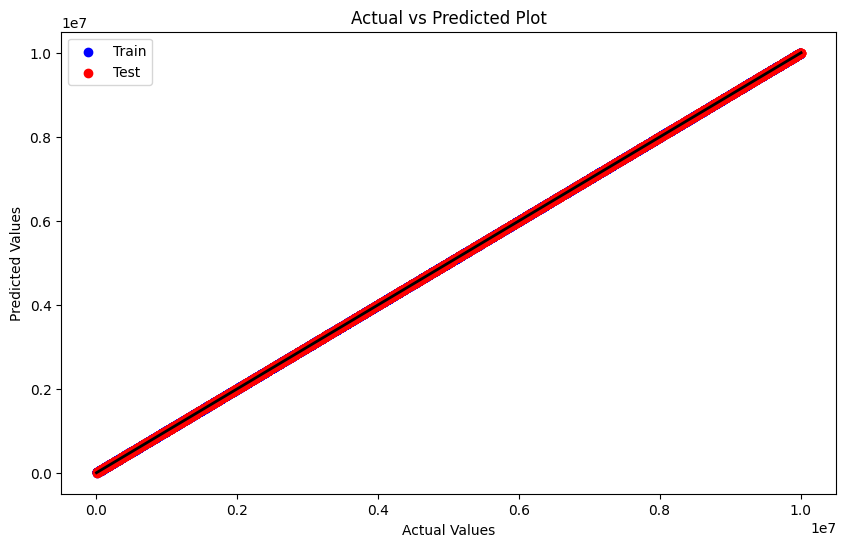

In [75]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_predict_train_model1, color='blue', label='Train')
plt.scatter(y_test, y_predict_test_model1, color='red', label='Test')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Plot')
plt.legend()
plt.show()

# 2. Random Forest Regressor

RandomForestRegressor Model as the 2nd highest accuracy based on cross validation score according to its default hyperparameters

RandomForestRegressor() = 99.99980571640626 %

In [76]:
# loading the Random Forest Regressor model
rfr = RandomForestRegressor()

In [77]:
# getting the best features of RFC by calling the feature selection function
best_score_rfr = 0
best_features_rfr = None
for i in range(X_train.shape[1]):
    col , score = find_best_feature(i+1,rfr,X_train,y_train)
    if best_score_rfr < score:
        best_score_rfr = score
        best_features_rfr = col
print(best_features_rfr)
print(best_score_rfr)

Selected columns:  ['squareMeters']
1 99.99980467531732
----------------------

Selected columns:  ['squareMeters', 'floors']
2 99.99982642385146
----------------------

Selected columns:  ['squareMeters', 'floors', 'attic']
3 99.99982088196646
----------------------

Selected columns:  ['squareMeters', 'floors', 'cityCode', 'attic']
4 99.99981634588842
----------------------

Selected columns:  ['squareMeters', 'floors', 'cityCode', 'basement', 'attic']
5 99.99981286525149
----------------------

Selected columns:  ['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'basement', 'attic']
6 99.99980925923741
----------------------

Selected columns:  ['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'basement', 'attic', 'garage']
7 99.99980669714151
----------------------

Selected columns:  ['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'made', 'basement', 'attic', 'garage']
8 99.99980600260164
----------------------

Selected columns:  ['squareMeters', 'numberOfRoom

Best Features : ['squareMeters', 'floors']

Best Score : 99.99982555529073 %

In [78]:
# using a diffferent df to store
X_train_best_features_rfr = X_train[best_features_rfr]

In [79]:
# getting the cross val score of rfr with its best features
cv_score_rfr = cross_val_score(rfr, X_train_best_features_rfr, y_train, cv=5)
print(cv_score_rfr)
print(cv_score_rfr.mean())

[0.99999827 0.99999823 0.99999825 0.99999832 0.99999821]
0.999998256597278


In [80]:
# fitting the default model with its best features
rfr.fit(X_train_best_features_rfr,y_train)

RandomForestRegressor()

In [81]:
# taking only best features of lr to test data
X_test_best_features_rfr = X_test[best_features_rfr]

In [82]:
best_features_rfr

['squareMeters', 'floors']

In [83]:
# predicting the labels on test data
y_predict_rfr = rfr.predict(X_test_best_features_rfr)

In [84]:
# calcuation the mae , mse , rmse , r2
mae_rfr = mean_absolute_error(y_test, y_predict_rfr)
mse_rfr = mean_squared_error(y_test, y_predict_rfr)
rmse_rfr = root_mean_squared_error(y_test, y_predict_rfr)
r2_rfr = r2_score(y_test, y_predict_rfr)

In [85]:
print("Mean Absolute Error (MAE):", mae_rfr)
print("Mean Squared Error (MSE):",mse_rfr)
print("Root Mean Squared Error (RMSE):" ,rmse_rfr)
print("R-squared (R2):", r2_rfr)

Mean Absolute Error (MAE): 2994.0171293439603
Mean Squared Error (MSE): 14138818.168031095
Root Mean Squared Error (RMSE): 3760.1619869403357
R-squared (R2): 0.9999983857504303


# Hyperparameter Tuning : Random Forest Regressor

In [86]:
# importing gridsearchcv to check the best hyperparameters
from sklearn.model_selection import GridSearchCV

In [87]:
# parameters for Random Forest Regressor & fitting the data and model to grid search cv
params_rfr = {
    'n_estimators': [100, 200,300, 400],
    'max_depth': [10, 20, 30,40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
grid_rfr = GridSearchCV(estimator=rfr, param_grid=params_rfr, cv=5, n_jobs=-1)
grid_rfr.fit(X_train_best_features_rfr, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]})

In [88]:
# getting the best hyperparameters
print(grid_rfr.best_estimator_, grid_rfr.best_params_, grid_rfr.best_score_)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=400) {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400} 0.9999983269376758


In [89]:
# testing grid_rfr model on test data
y_predict_grid_rfr = grid_rfr.predict(X_test_best_features_rfr)

In [90]:
# calcuation the mae , mse , rmse , r2
mae_grid_rfr = mean_absolute_error(y_test, y_predict_grid_rfr)
mse_grid_rfr = mean_squared_error(y_test, y_predict_grid_rfr)
rmse_grid_rfr = root_mean_squared_error(y_test, y_predict_grid_rfr)
r2_grid_rfr = r2_score(y_test, y_predict_grid_rfr)

print("Mean Absolute Error (MAE):", mae_grid_rfr)
print("Mean Squared Error (MSE):",mse_grid_rfr)
print("Root Mean Squared Error (RMSE):" ,rmse_grid_rfr)
print("R-squared (R2):", r2_grid_rfr)

Mean Absolute Error (MAE): 2936.3693815864594
Mean Squared Error (MSE): 13658981.983220607
Root Mean Squared Error (RMSE): 3695.805999132071
R-squared (R2): 0.99999844053403


Best Parameters : {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}

# Final Model : Random Forest Regressor

In [91]:
# loading the model with best hyper parameter
model2 = RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=400)

In [92]:
# fitting the training data with best features of rfr
model2.fit(X_train_best_features_rfr,y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=400)

# Model Evaluation : Random Forest Regressor

In [93]:
# predicting the train data
y_predict_train_model2 = model2.predict(X_train_best_features_rfr)

In [94]:
# calcuation the mae , mse , rmse , r2
mae_train_model2 = mean_absolute_error(y_train, y_predict_train_model2)
mse_train_model2 = mean_squared_error(y_train, y_predict_train_model2)
rmse_train_model2 = root_mean_squared_error(y_train, y_predict_train_model2)
r2_train_model2 = r2_score(y_train, y_predict_train_model2)

In [95]:
print("Model2 on Training Data:")
print("Mean Absolute Error (MAE):", mae_train_model2)
print("Mean Squared Error (MSE):",mse_train_model2)
print("Root Mean Squared Error (RMSE):" ,rmse_train_model2)
print("R-squared (R2):", r2_train_model2)

Model2 on Training Data:
Mean Absolute Error (MAE): 1522.6563588145664
Mean Squared Error (MSE): 3655273.845181188
Root Mean Squared Error (RMSE): 1911.877047610852
R-squared (R2): 0.9999995517437468


In [96]:
# predicting the test data
y_predict_test_model2 = model2.predict(X_test_best_features_rfr)

In [97]:
# calcuation the mae , mse , rmse , r2
mae_test_model2 = mean_absolute_error(y_test, y_predict_test_model2)
mse_test_model2 = mean_squared_error(y_test, y_predict_test_model2)
rmse_test_model2 = root_mean_squared_error(y_test, y_predict_test_model2)
r2_test_model2 = r2_score(y_test, y_predict_test_model2)

In [98]:
print("Model2 on Test Data:")
print("Mean Absolute Error (MAE):", mae_test_model2)
print("Mean Squared Error (MSE):",mse_test_model2)
print("Root Mean Squared Error (RMSE):" ,rmse_test_model2)
print("R-squared (R2):", r2_test_model2)

Model2 on Test Data:
Mean Absolute Error (MAE): 2947.179252308179
Mean Squared Error (MSE): 13715356.032612994
Root Mean Squared Error (RMSE): 3703.4249057612865
R-squared (R2): 0.9999984340977223


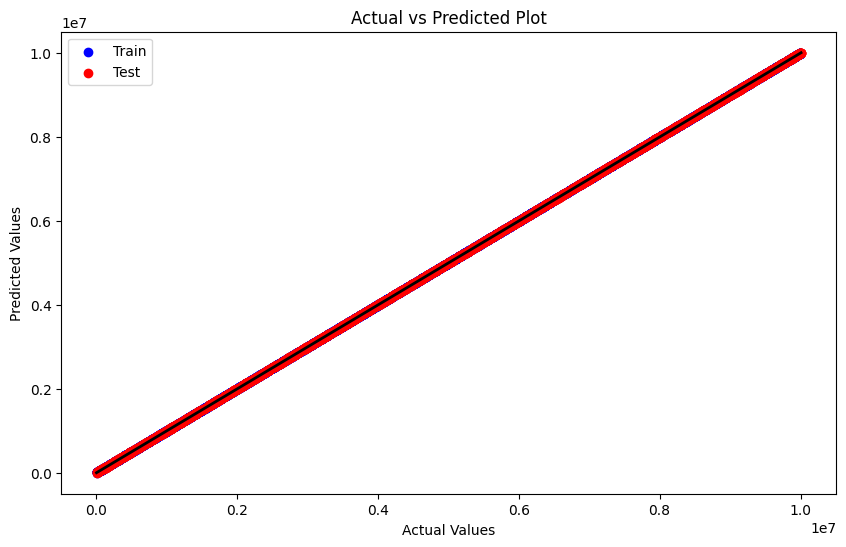

In [99]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_predict_train_model2, color='blue', label='Train')
plt.scatter(y_test, y_predict_test_model2, color='red', label='Test')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Plot')
plt.legend()
plt.show()

# 3. XG Boost Regressor

XG Boost Regressor Model as the 3rd highest accuracy based on cross validation score according to its default hyperparameters

XGBRegressor() = 99.99726021214599 %

In [100]:
# loading the XG Boost Regressor model
xgb = XGBRegressor()

In [101]:
# getting the best features of XG Boost Regressor by calling the feature selection function
best_score_xgb = 0
best_features_xgb = None
for i in range(X_train.shape[1]):
    col , score = find_best_feature(i+1,xgb,X_train,y_train)
    if best_score_xgb < score:
        best_score_xgb = score
        best_features_xgb = col
print(best_features_xgb)
print(best_score_xgb)

Selected columns:  ['squareMeters']
1 99.99800325075283
----------------------

Selected columns:  ['squareMeters', 'hasPool']
2 99.99798221768246
----------------------

Selected columns:  ['squareMeters', 'hasPool', 'floors']
3 99.99777493903007
----------------------

Selected columns:  ['squareMeters', 'hasPool', 'floors', 'attic']
4 99.99766560388267
----------------------

Selected columns:  ['squareMeters', 'hasPool', 'floors', 'attic', 'garage']
5 99.99757602741963
----------------------

Selected columns:  ['squareMeters', 'hasPool', 'floors', 'basement', 'attic', 'garage']
6 99.99750412461792
----------------------

Selected columns:  ['squareMeters', 'hasPool', 'floors', 'cityCode', 'basement', 'attic', 'garage']
7 99.99743605895726
----------------------

Selected columns:  ['squareMeters', 'hasPool', 'floors', 'cityCode', 'basement', 'attic', 'garage', 'hasGuestRoom']
8 99.99743142985616
----------------------

Selected columns:  ['squareMeters', 'hasPool', 'floors', 'city

Best Features : ['squareMeters']

Best Score : 99.99800325075283 %

In [102]:
# using a diffferent df to store
X_train_best_features_xgb = X_train[best_features_xgb]

In [103]:
# getting the cross val score of xgb with its best features
cv_score_xgb = cross_val_score(xgb, X_train_best_features_xgb, y_train, cv=5)
print(cv_score_xgb)
print(cv_score_xgb.mean())

[0.99997951 0.99998032 0.99997971 0.99998037 0.99998026]
0.9999800325075283


In [104]:
# fitting the default model with its best features
xgb.fit(X_train_best_features_xgb,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [105]:
# taking only best features of xgb to test data
X_test_best_features_xgb = X_test[best_features_xgb]

In [106]:
best_features_xgb

['squareMeters']

In [107]:
# predicting the labels on test data
y_predict_xgb = xgb.predict(X_test_best_features_xgb)

In [108]:
# calcuation the mae , mse , rmse , r2
mae_xgb = mean_absolute_error(y_test, y_predict_xgb)
mse_xgb = mean_squared_error(y_test, y_predict_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_predict_xgb)
r2_xgb = r2_score(y_test, y_predict_xgb)

In [109]:
print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):",mse_xgb)
print("Root Mean Squared Error (RMSE):" ,rmse_xgb)
print("R-squared (R2):", r2_xgb)

Mean Absolute Error (MAE): 10372.639192968756
Mean Squared Error (MSE): 152595611.36714393
Root Mean Squared Error (RMSE): 12352.95961974878
R-squared (R2): 0.9999825779356479


# Hyperparameter Tuning : XG Boost Regressor

In [110]:
# parameters for XG Boost Classifier
params_xgb = {
    'n_estimators': [300, 350, 400],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1,2,3,4,5],
    }

In [111]:
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params_xgb, cv=5, n_jobs=-1)
grid_xgb.fit(X_train_best_features_xgb, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [300, 350, 400]})

In [112]:
# getting the best hyperparameters
print(grid_xgb.best_estimator_, grid_xgb.best_params_, grid_xgb.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400} 0.9999802287692118


In [114]:
# testing grid_xgb model on test data
y_predict_grid_xgb = grid_xgb.predict(X_test_best_features_xgb)

In [115]:
# calcuation the mae , mse , rmse , r2
mae_grid_xgb = mean_absolute_error(y_test, y_predict_grid_xgb)
mse_grid_xgb = mean_squared_error(y_test, y_predict_grid_xgb)
rmse_grid_xgb = root_mean_squared_error(y_test, y_predict_grid_xgb)
r2_grid_xgb = r2_score(y_test, y_predict_grid_xgb)

print("Mean Absolute Error (MAE):", mae_grid_xgb)
print("Mean Squared Error (MSE):",mse_grid_xgb)
print("Root Mean Squared Error (RMSE):" ,rmse_grid_xgb)
print("R-squared (R2):", r2_grid_xgb)

Mean Absolute Error (MAE): 10374.200466015629
Mean Squared Error (MSE): 152053415.14693195
Root Mean Squared Error (RMSE): 12330.994085917484
R-squared (R2): 0.9999826398389842


Best Parameters : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}

# Final Model : XG Boost Regressor

In [116]:
# loading the model with best hyper parameter
model3 = XGBRegressor(learning_rate= 0.1, max_depth= 5, n_estimators= 400)

In [117]:
# fitting the training data with best features of rfr
model3.fit(X_train_best_features_xgb,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model Evaluation : XG Boost Regressor

In [118]:
# predicting the train data
y_predict_train_model3 = model3.predict(X_train_best_features_xgb)

In [119]:
# calcuation the mae , mse , rmse , r2
mae_train_model3 = mean_absolute_error(y_train, y_predict_train_model3)
mse_train_model3 = mean_squared_error(y_train, y_predict_train_model3)
rmse_train_model3 = root_mean_squared_error(y_train, y_predict_train_model3)
r2_train_model3 = r2_score(y_train, y_predict_train_model3)

In [120]:
print("Model3 on Training Data:")
print("Mean Absolute Error (MAE):", mae_train_model3)
print("Mean Squared Error (MSE):",mse_train_model3)
print("Root Mean Squared Error (RMSE):" ,rmse_train_model3)
print("R-squared (R2):", r2_train_model3)

Model3 on Training Data:
Mean Absolute Error (MAE): 10261.424235253908
Mean Squared Error (MSE): 148671093.36036962
Root Mean Squared Error (RMSE): 12193.075631700543
R-squared (R2): 0.9999817680562123


In [121]:
# predicting the test data
y_predict_test_model3 = model3.predict(X_test_best_features_xgb)

In [122]:
# calcuation the mae , mse , rmse , r2
mae_test_model3 = mean_absolute_error(y_test, y_predict_test_model3)
mse_test_model3 = mean_squared_error(y_test, y_predict_test_model3)
rmse_test_model3 = root_mean_squared_error(y_test, y_predict_test_model3)
r2_test_model3 = r2_score(y_test, y_predict_test_model3)

In [123]:
print("Model3 on Test Data:")
print("Mean Absolute Error (MAE):", mae_test_model3)
print("Mean Squared Error (MSE):",mse_test_model3)
print("Root Mean Squared Error (RMSE):" ,rmse_test_model3)
print("R-squared (R2):", r2_test_model3)

Model3 on Test Data:
Mean Absolute Error (MAE): 10374.200466015629
Mean Squared Error (MSE): 152053415.14693195
Root Mean Squared Error (RMSE): 12330.994085917484
R-squared (R2): 0.9999826398389842


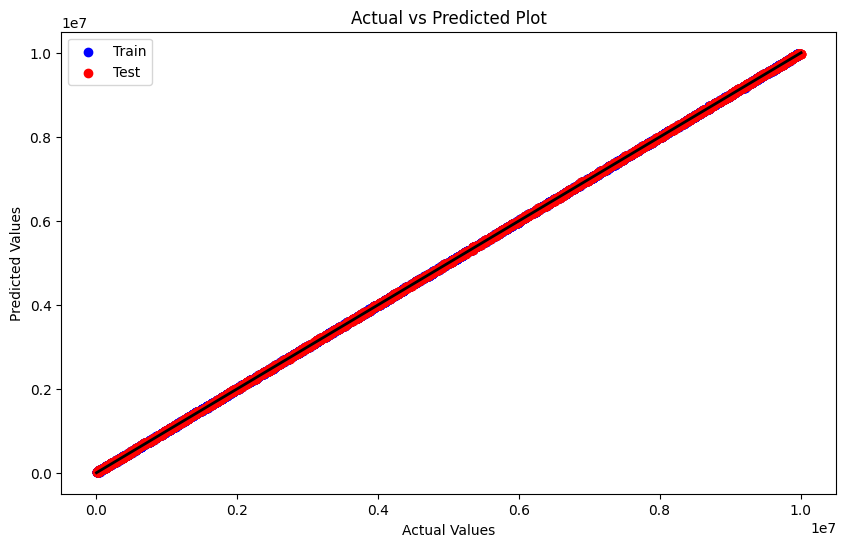

In [124]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_predict_train_model3, color='blue', label='Train')
plt.scatter(y_test, y_predict_test_model3, color='red', label='Test')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Plot')
plt.legend()
plt.show()

# Conclusion

Model 1 : Linear Regression Model

Training Data Accuracy : 99.999%  

Testing Data Accuracy : 99.999%

Model 2 : Random Forest Regressor

Training Data Accuracy : 99.999%

Testing Data Accuracy : 99.999%

Model 3 : XG Boost Regressor

Training Data Accuracy : 99.998%

Testing Data Accuracy : 99.998%

# Predictive System

Buliding a Predictive System for here

In [125]:
#taking input data
input_data = (47664,44,0,0,77,98008,6,3,2010,1,1,2662,5433,417,0,6)

#loading columns
columns = all_columns

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=columns)

#standardizing the data
df[columns] = scaler.transform(df[columns])

#loading best features
df_best_features_lr = df[best_features_lr]
df_best_features_rfr = df[best_features_rfr]
df_best_features_xgb = df[best_features_xgb]

#predictions
prediction1 = model1.predict(df_best_features_lr)
prediction2 = model2.predict(df_best_features_rfr)
prediction3 = model3.predict(df_best_features_xgb)


print(prediction1)

print(prediction2)

print(prediction3)


[4771386.09605159]
[4772512.78080774]
[4774642.]


Building the Predictive System to export

In [126]:
import json
import pickle
with open('columns.pkl', 'wb') as file:
    pickle.dump(all_columns, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('best_features_lr.json', 'w') as file:
    json.dump(best_features_lr, file)
with open('best_features_rfr.json', 'w') as file:
    json.dump(best_features_rfr, file)
with open('best_features_xgb.json', 'w') as file:
    json.dump(best_features_xgb, file)
with open('house_price_prediction_trained_lr_model.sav', 'wb') as f:
    pickle.dump(model1, f)
with open('house_price_prediction_trained_rfr_model.sav', 'wb') as f:
    pickle.dump(model2, f)
with open('house_price_prediction_trained_xgb_model.sav', 'wb') as f:
    pickle.dump(model3, f)

In [127]:
#loading. the saved model
with open('columns.pkl', 'rb') as f:
    all_features = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scalers = pickle.load(f)
with open('best_features_lr.json', 'r') as file:
    best_features_lr = json.load(file)
with open('best_features_rfr.json', 'r') as file:
    best_features_rfr = json.load(file)
with open('best_features_xgb.json', 'r') as file:
    best_features_xgb = json.load(file)
with open('house_price_prediction_trained_lr_model.sav', 'rb') as f:
    loaded_model_lr = pickle.load(f)
with open('house_price_prediction_trained_rfr_model.sav', 'rb') as f:
    loaded_model_rfr = pickle.load(f)
with open('house_price_prediction_trained_xgb_model.sav', 'rb') as f:
    loaded_model_xgb = pickle.load(f)

In [128]:
#taking input data
input_data = (47664,44,0,0,77,98008,6,3,2010,1,1,2662,5433,417,0,6)

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=all_features)

#loading columns
df[all_features] = scalers.transform(df[all_features])

#loading best features
df_best_features_lr = df[best_features_lr]
df_best_features_rfr = df[best_features_rfr]
df_best_features_xgb = df[best_features_xgb]

#predictions
prediction1 = loaded_model_lr.predict(df_best_features_lr)
prediction2 = loaded_model_rfr.predict(df_best_features_rfr)
prediction3 = loaded_model_xgb.predict(df_best_features_xgb)

print(prediction1)

print(prediction2)

print(prediction3)


[4771386.09605159]
[4772512.78080774]
[4774642.]


# Extra

Model Training

XGBoost Regressor

Making a Predictive System

In [ ]:
input_data=(47664,44,0,0,77,98008,6,3,2010,1,1,2662,5433,417,0,6)


#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print('The Predcited price of this house : ', prediction[0],'Euros')

The Predcited price of this house :  4762162.5 Euros


In [ ]:
type(input_data[0])

int

In [ ]:
import pickle
filename = "house_price_prediction_model.sav"
pickle.dump(model , open(filename,'wb'))
#loading. the saved model
loaded_model = pickle.load(open('house_price_prediction_model.sav','rb'))

In [ ]:
input_data=(47664,44,0,0,77,98008,6,3,2010,1,1,2662,5433,417,0,6)

#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

print('The Predcited price of this house : ', prediction[0],'Euros')

The Predcited price of this house :  4762162.5 Euros


In [ ]:
#columns in dataframe
house_price_dataset.columns


Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [ ]:
house_price_dataset.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1      3653   2436     128               1             2  8085989.5  
2      2937   8852     135               1             9  5574642.1  
3       659   7141     359               0             3  3232561.2  
4      8435   2429     292               1             4  7055052.0

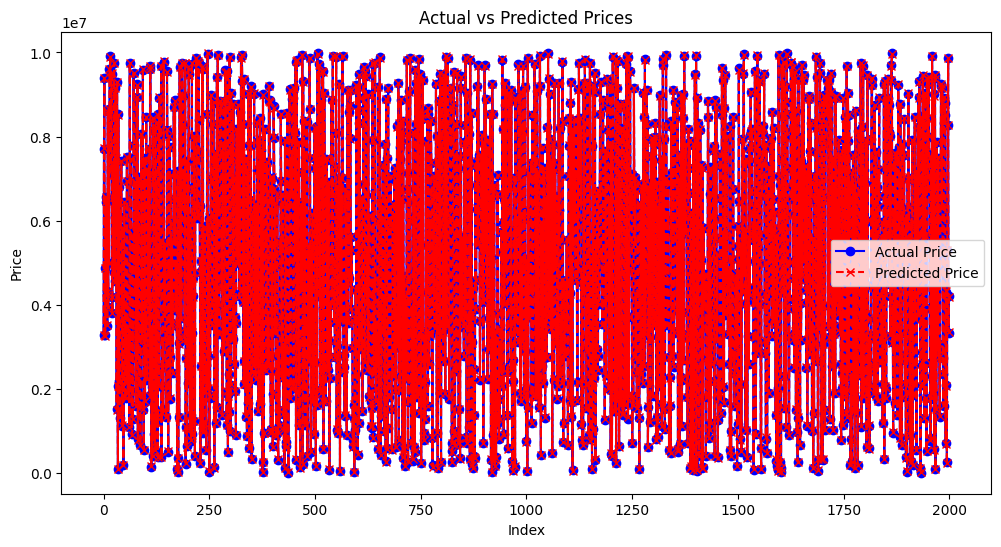

In [ ]:
#graphical analysis of actual price and predicted price with different colors for actual and predicted price

indices = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(indices, Y_test, color='blue', marker='o', linestyle='-', label='Actual Price')
plt.plot(indices, test_data_prediction, color='red', marker='x', linestyle='--', label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()



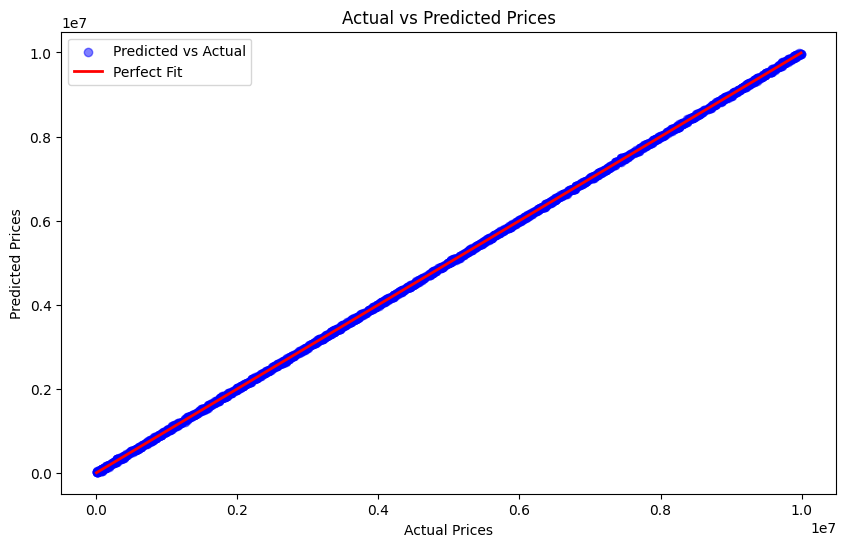

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
# size of house in square meters
# number of house rooms
# does house include yard? 0 - no, 1 - yes
# does house include a pool
# how many floors are there
# number of zip code
# range - 0 - cheapest, 10 - the most expensive
# number of prevoiouse owners
# year made
# is it new or renovated



# squareMeters
# numberOfRooms
# hasYard 0 - no, 1 - yes
# hasPool 0 - no, 1 - yes
# floors - number of floors
# cityCode - zip code
# cityPartRange - the higher the range, the more exclusive the neighbourhood is range - 0 - cheapest, 10 - the most expensive
# numPrevOwners - number of prevoious owners
# made - year
# isNewBuilt  0 - no, 1 - yes
# hasStormProtector  0 - no, 1 - yes
# basement - basement square meters
# attic - attic square meteres
# garage - garage size  0 - no, 1 - yes
# hasStorageRoom
# hasGuestRoom - number of guest rooms
# price - predicted value